In [1]:
import pandas as pd

In [3]:
#Importación de datos
Dataset = pd.read_csv("C:/Users/lfvvi/OneDrive/Documentos/ESCRITORIO/DS - SELF LEARNING/MACHINE LEARNING/1. SUPERVISED/3. Decision Trees (DT)/Python/DataSet.csv")

#Análisis descriptivo de los datos
Dataset.describe(include="all")

,outlook,temp.,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,6,6,7,8,9


In [5]:
Dataset.head(n=14)

,outlook,temp.,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainny,mild,high,False,yes
4,rainny,cool,normal,False,yes
5,rainny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,sunny,mild,normal,False,yes


In [35]:
Dataset_Dummies = pd.get_dummies(Dataset, columns=["outlook", "temp.", "humidity", "windy", "play"])
Dataset_Dummies

Dataset_Dummies_Modified = Dataset_Dummies.drop(["play_no", "windy_False" ],axis=1)
Dataset_Dummies_Modified

Tag_Names = Dataset_Dummies_Modified.columns

In [32]:
from sklearn.model_selection import train_test_split
Y = Dataset_Dummies_Modified['play_yes']
X = Dataset_Dummies_Modified.drop('play_yes',axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

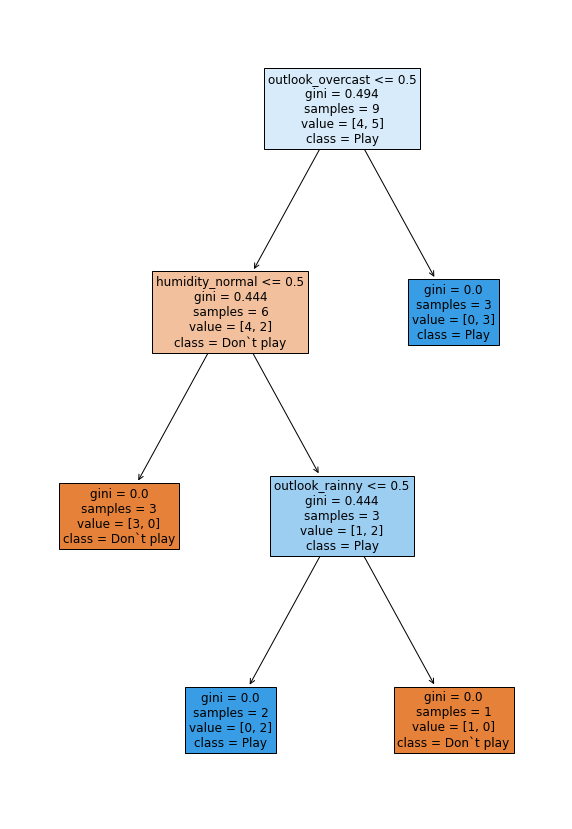

In [56]:
from sklearn.tree import DecisionTreeClassifier
CLF = DecisionTreeClassifier(ccp_alpha=0.05)
CLF= CLF.fit(X_train,Y_train)

fig = plt.figure(figsize=(10,15))
_ = tree.plot_tree(CLF,
                   feature_names=Tag_Names,
                   class_names={0:'Don`t play', 1:'Play'},
                   filled=True,
                  fontsize=12)

In [57]:
predictions = CLF.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=['Don`t play','Play']))

              precision    recall  f1-score   support

  Don`t play       0.33      1.00      0.50         1
        Play       1.00      0.50      0.67         4

    accuracy                           0.60         5
   macro avg       0.67      0.75      0.58         5
weighted avg       0.87      0.60      0.63         5



https://github.com/misraturp/Decision-Tree-Implementation/blob/main/Decision%20Trees%20with%20Scikitlearn.ipynb